In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _init_paths
import os
%matplotlib inline

In [2]:
import caffe

In [3]:
MODEL_FILE = '../models/Debug/train_liftedstructsim_softmax_embed64.prototxt'
MEAN_FILE = '../data/imagenet_mean.binaryproto'

In [4]:
blob1 = caffe.proto.caffe_pb2.BlobProto()
data1 = open(MEAN_FILE , 'rb').read()
blob1.ParseFromString(data1)
mean_arr = caffe.io.blobproto_to_array(blob1)[0]

In [5]:
#net = caffe.Net(MODEL_FILE, caffe.TRAIN)
net = caffe.Net(MODEL_FILE, caffe.TRAIN)

In [6]:
# running this grabs a new batch and pushes it through forward pass
batch = net.forward()

In [7]:
img_batch = net.blobs['data'].data.copy()

In [8]:
labels = net.blobs['label'].data.copy()

In [9]:
print img_batch.shape
print labels.shape

(256, 3, 256, 256)
(256,)


(3, 256, 256)


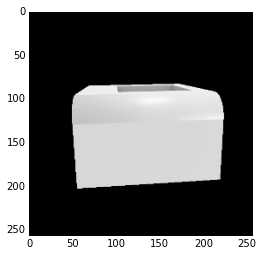

In [34]:
idx1 = 25
im1 = img_batch[idx1,:,:,:] + mean_arr
im1 = np.transpose(im1, (1,2,0))
im1 = im1[:,:,(2,1,0)]
im1 = im1.astype(np.uint8)
print img_batch[idx1,:,:,:].shape
plt.imshow(im1)

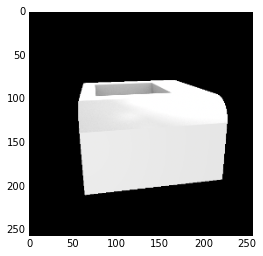

In [35]:
idx2 = idx1 + img_batch.shape[0] / 2
im2 = img_batch[idx2,:,:,:] + mean_arr
im2 = np.transpose(im2, (1,2,0))
im2 = im2[:,:,(2,1,0)] 
im2 = im2.astype(np.uint8)
plt.imshow(im2)

In [36]:
print labels[idx1], labels[idx2]

89.0 89.0
